<a href="https://colab.research.google.com/github/yaraaldos/Diabetes-risk-prediction/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Part one ( data analysis)`**

**Uploading data and viewing some samples :**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Raw_data.csv"
df = pd.read_csv(url) # to upload and read data
df_copy= pd.read_csv(url) # the one used for for data of cleaning (preprocessed)

print("Loaded shape:", df.shape) # to show the number of columns and rows
print("\nHead:")
print(df.head()) # shows a sample of 5 rows of all coulmns (This step i put to ensure the data loaded correctly)

Loaded shape: (1000, 14)

Head:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


**Five number summery :**

In [ ]:
df.describe() # for showing the five number summery (statistical summury)

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


**Graphs:**

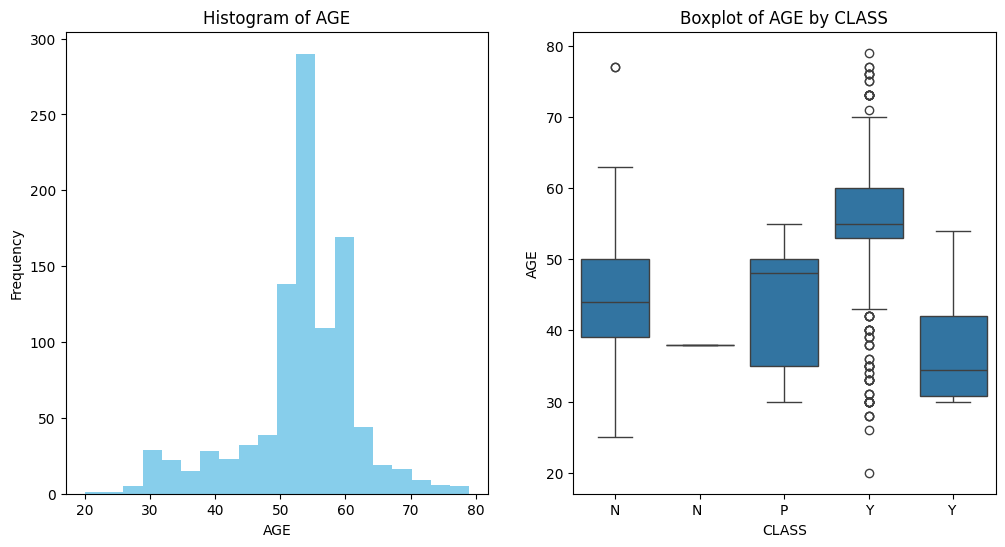

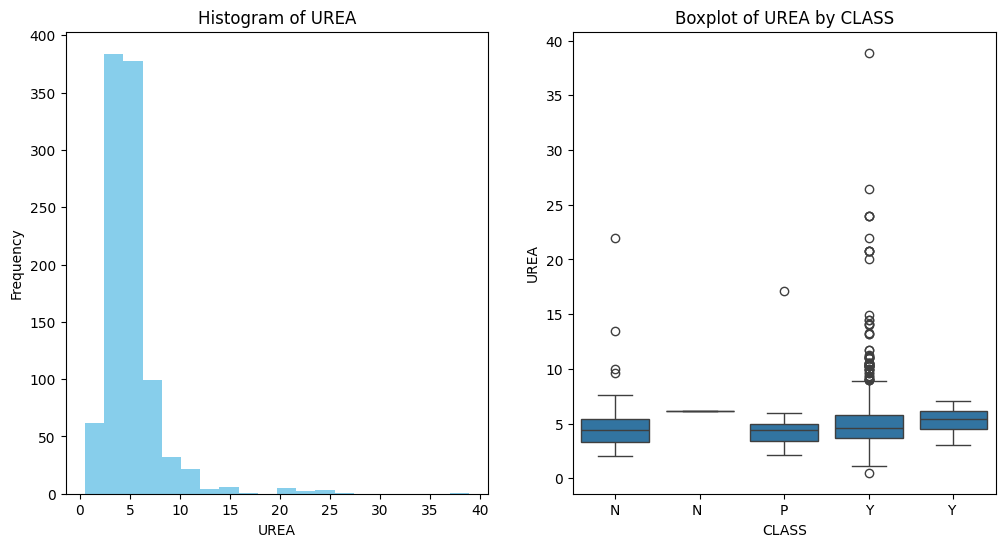

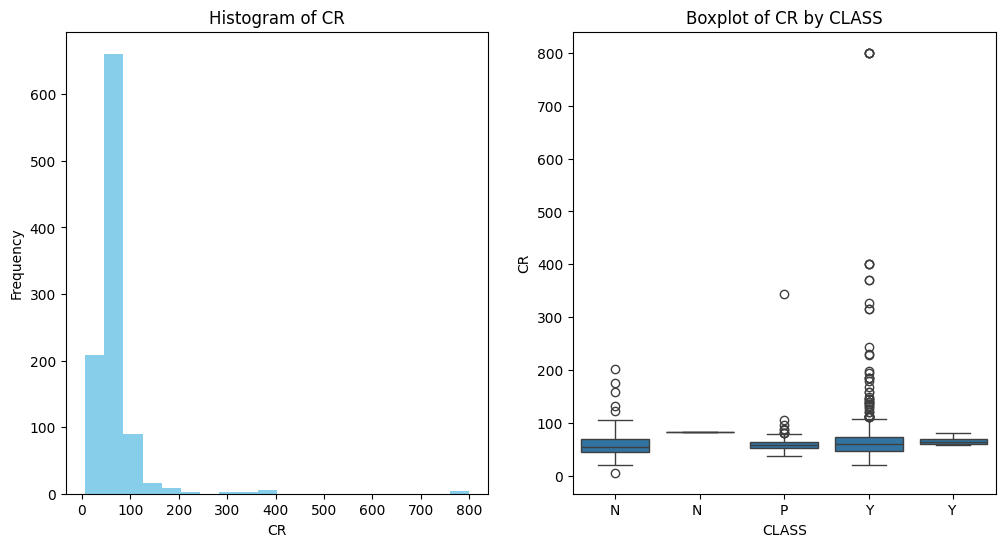

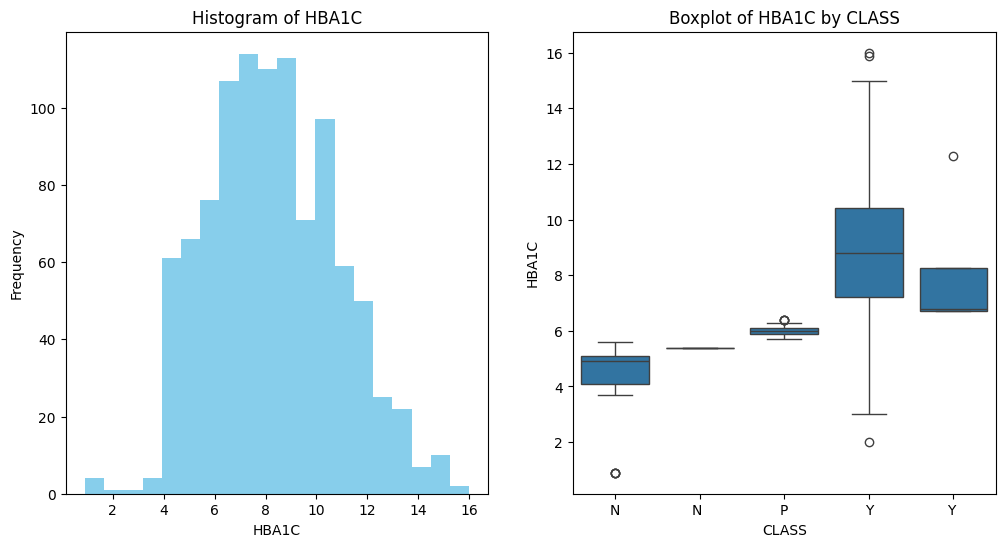

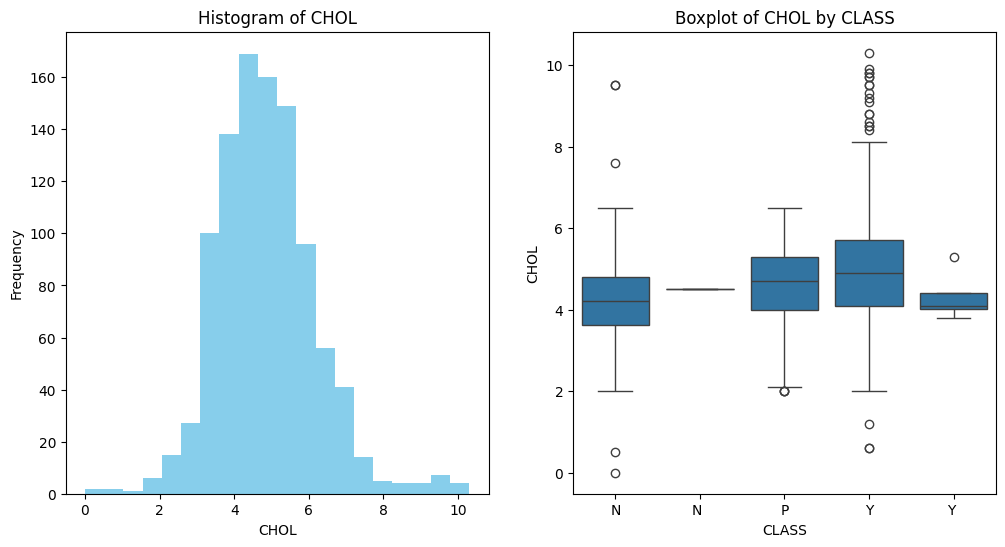

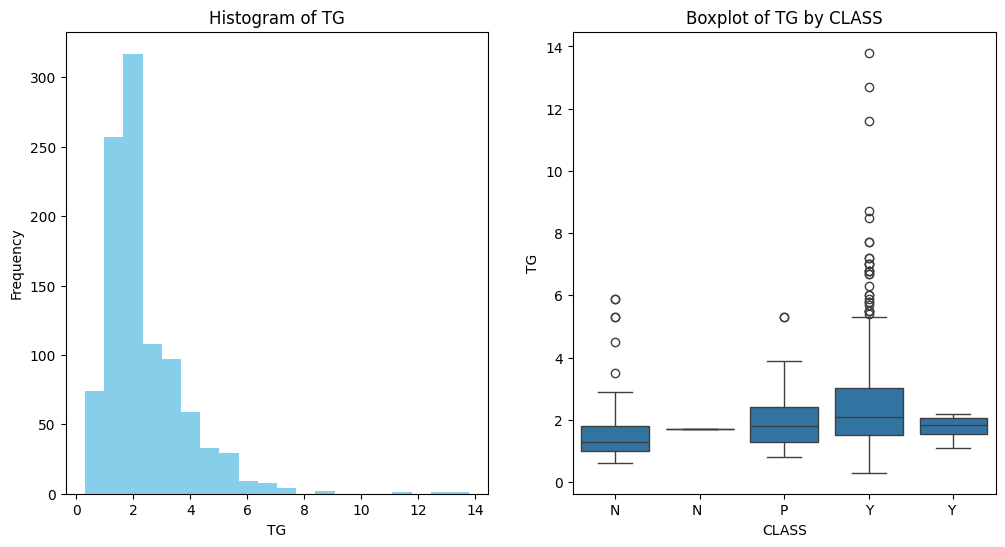

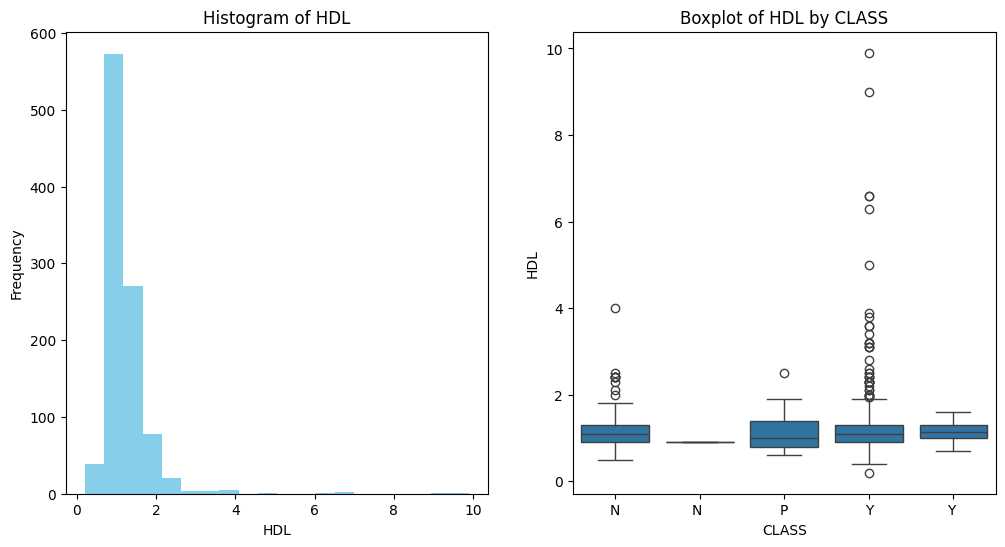

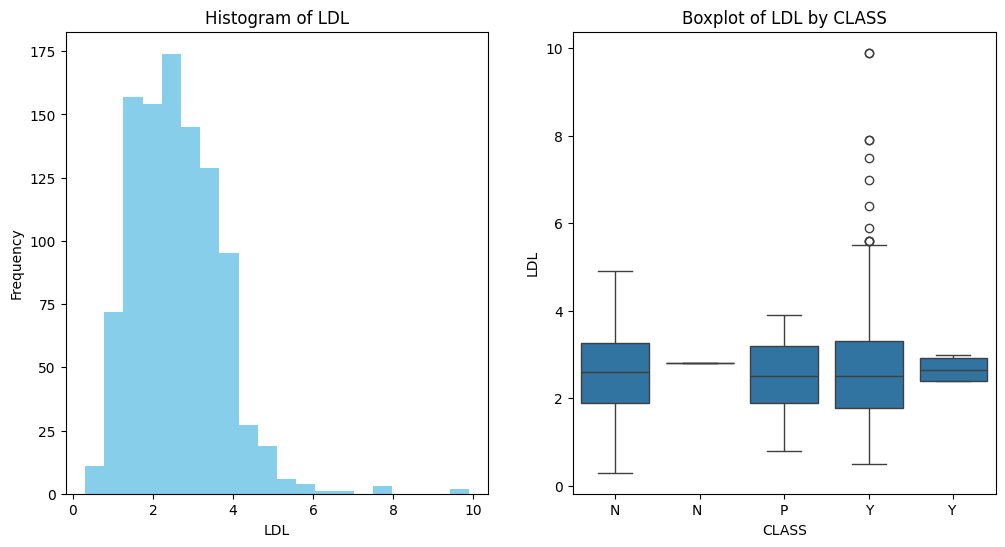

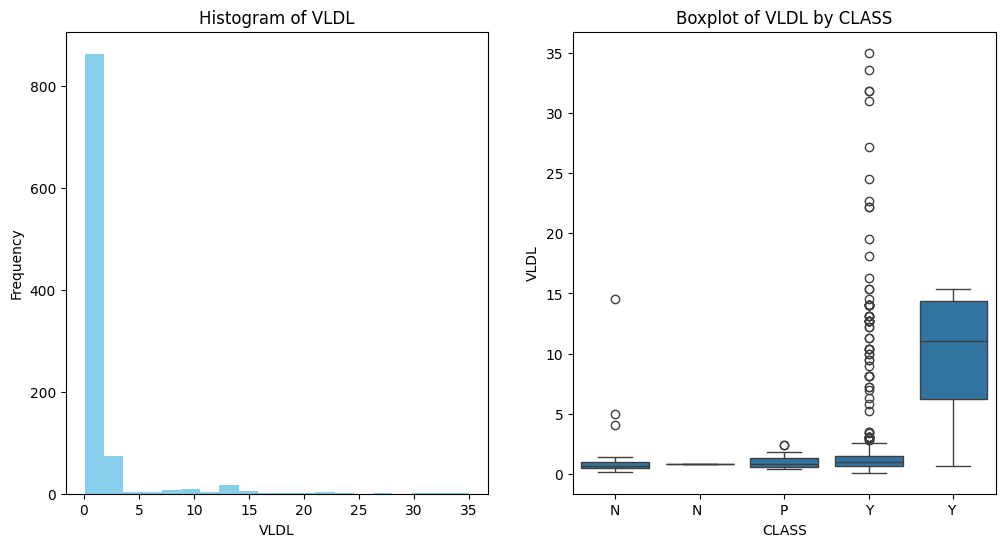

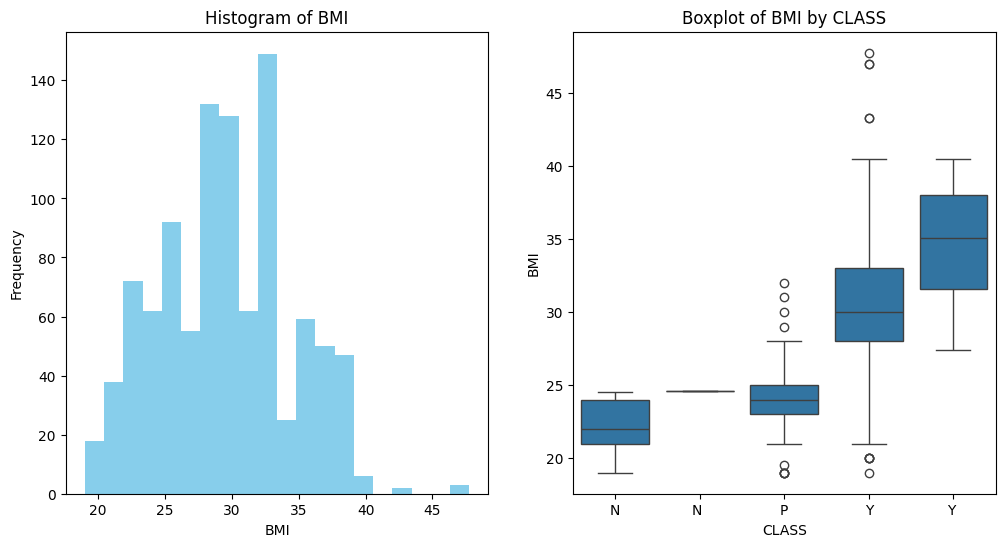

In [ ]:

df.columns = df.columns.str.strip().str.upper()

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ["ID", "NO_PATION"]]


for col in numeric_cols:
    vals = df[col].dropna()

    plt.figure(figsize=(12,6))

     #Histogram
    plt.subplot(1, 2, 1)
    plt.hist(vals, bins=20, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

     # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="CLASS", y=col, data=df)
    plt.title(f"Boxplot of {col} by CLASS")
    plt.xlabel("CLASS")
    plt.ylabel(col)



plt.show()




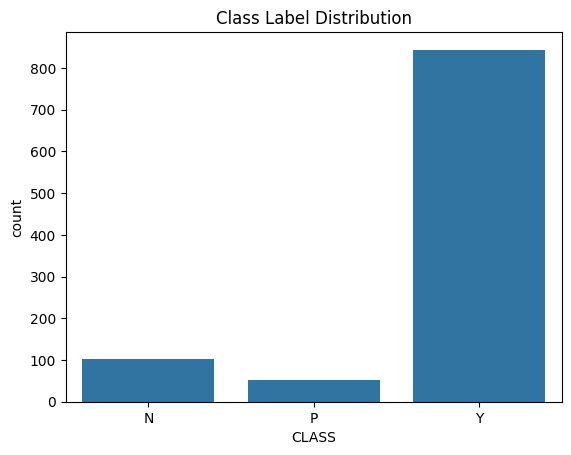

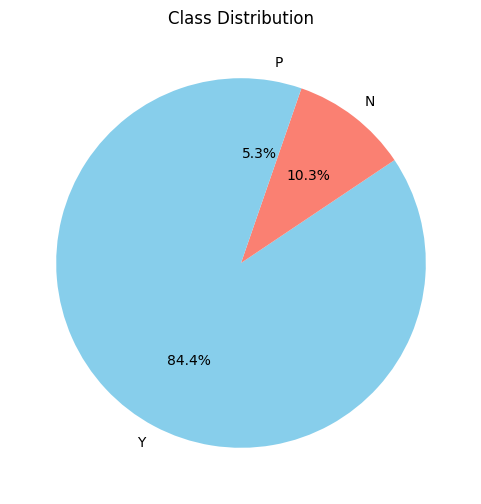

In [ ]:
# Plot showing class label distributions
df["CLASS"] = df["CLASS"].str.strip().str.upper()
import matplotlib.pyplot as plt

import seaborn as sns
sns.countplot(x="CLASS", data=df)
plt.title("Class Label Distribution")
plt.show()

plt.figure(figsize=(6, 6))
df['CLASS'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title("Class Distribution")
plt.ylabel('')
plt.show()


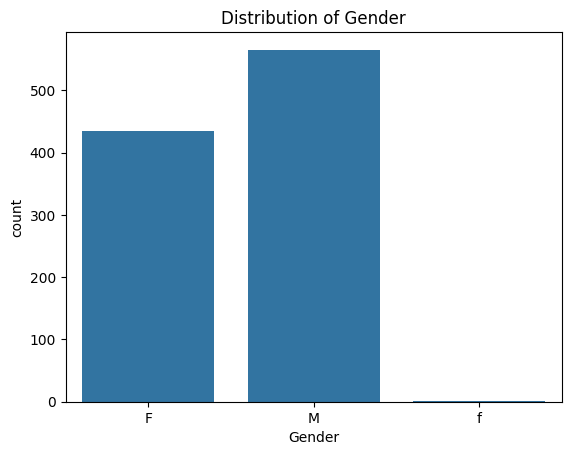

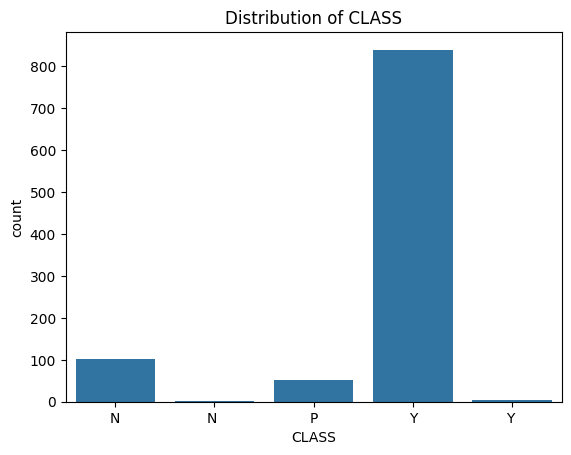

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url="https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Raw_data.csv"
df = pd.read_csv(url)

# Bar plot for Gender
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.show()

# Bar plot for CLASS
sns.countplot(x='CLASS', data=df)
plt.title("Distribution of CLASS")
plt.show()


**Missing values:**

In [ ]:

# Display missing values count and percentage for each column

missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Rows with missing values:
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64


that all attributes (ID, No_Pation, Gender, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI, and CLASS) have 0 missing values . This indicates that the dataset is complete with no missing data, and therefore no imputation or preprocessing is required for missing values.Note: The ID column is an identifier only and is not used for prediction. It has no missing values, which confirms that all records are properly indexed.